# Feature Engineering with Python Project

## 1. Defining the Question

### a) Prediction question

> predicting the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at the final destination for Sendy

### b) Defining the Metric for Success

>  Build a model that predicts an accurate delivery time, from picking up a package arriving at the final
destination. An accurate arrival time prediction will help all business to improve their logistics and communicate the accurate time their time to their customers. 

### c) Understanding the context 

> Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to 320%; while in Europe, it only accounts for up to 90% of the manufacturing cost. Sendy is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa. The company is headquartered in Kenya with a team of more than 100 staff, focused on building practical
solutions for Africa’s dynamic transportation needs, from developing apps and web solutions to providing dedicated support for goods on the move.

### d) Recording the Experimental Design

# steps/approach

* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model improvement using feature improvement
* Model Evaluation
* Challenging your Solution
* Recommendations











### e) Data Relevance


> The dataset is adequate for the analysis



## 2. Reading the Data

In [1]:
# Loading libraries
# ---
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    

In [2]:
# Loading the dataset

df = pd.read_csv('https://bit.ly/3deaKEM')
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [3]:
# Determining the size 
# ---
#
df.shape

(21201, 29)

In [4]:
# Checking the datatypes
# ---
# 
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [5]:
#check the variance of the variable values
df.nunique()

Order No                                     21201
User Id                                       3186
Vehicle Type                                     1
Platform Type                                    4
Personal or Business                             2
Placement - Day of Month                        31
Placement - Weekday (Mo = 1)                     7
Placement - Time                             15686
Confirmation - Day of Month                     31
Confirmation - Weekday (Mo = 1)                  7
Confirmation - Time                          15742
Arrival at Pickup - Day of Month                31
Arrival at Pickup - Weekday (Mo = 1)             7
Arrival at Pickup - Time                     15767
Pickup - Day of Month                           31
Pickup - Weekday (Mo = 1)                        7
Pickup - Time                                15690
Arrival at Destination - Day of Month           31
Arrival at Destination - Weekday (Mo = 1)        7
Arrival at Destination - Time  

In [6]:
#check for null values
df.isnull().sum() #temperature and precipation 

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [7]:
# Statistical summary
# ---
#
df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [8]:
#check for duplicate observations
df.duplicated().sum() # no duplicated record

0

## 4. Data Preparation

In [9]:
#standardise columns names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '').str.replace('=', '').str.strip()
df.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Index(['order_no', 'user_id', 'vehicle_type', 'platform_type',
       'personal_or_business', 'placement__day_of_month',
       'placement__weekday_mo__1', 'placement__time',
       'confirmation__day_of_month', 'confirmation__weekday_mo__1',
       'confirmation__time', 'arrival_at_pickup__day_of_month',
       'arrival_at_pickup__weekday_mo__1', 'arrival_at_pickup__time',
       'pickup__day_of_month', 'pickup__weekday_mo__1', 'pickup__time',
       'arrival_at_destination__day_of_month',
       'arrival_at_destination__weekday_mo__1', 'arrival_at_destination__time',
       'distance_km', 'temperature', 'precipitation_in_millimeters',
       'pickup_lat', 'pickup_long', 'destination_lat', 'destination_long',
       'rider_id', 'time_from_pickup_to_arrival'],
      dtype='object')

In [10]:
# Dropping irrelevant columns
# --- vehicle_type dropped since it only one value
df.drop(columns=['order_no', 'user_id', 'vehicle_type', 'pickup_lat', 'pickup_long', 'destination_lat', 'destination_long', 'rider_id'], inplace=True)

In [11]:
# Handling missing data
# ---
#replace missing value in temperature with mean of values and drop precipitation_in_millimeters
df.drop(columns='precipitation_in_millimeters', inplace=True)
df.loc[df['temperature'].isnull(), 'temperature'] = df['temperature'].mean()

In [12]:
#correct the "time" columns object datatype to numerics
df['placement__time'] = df.loc[:, 'placement__time'].str.split(':').apply(lambda x: int(x[0]))
df['confirmation__time'] = df.loc[:, 'confirmation__time'].str.split(':').apply(lambda x: int(x[0]))
df['arrival_at_pickup__time'] = df.loc[:, 'arrival_at_pickup__time'].str.split(':').apply(lambda x: int(x[0]))
df['pickup__time'] = df.loc[:, 'pickup__time'].str.split(':').apply(lambda x: int(x[0]))
df['arrival_at_destination__time'] = df.loc[:, 'arrival_at_destination__time'].str.split(':').apply(lambda x: int(x[0]))


In [13]:
#personal_or_business is nominal variable. convert to categorical variables
df = pd.get_dummies(df, drop_first=True)

In [14]:
#data preparation done. create train dataset set
train = df.copy()
train.columns

Index(['platform_type', 'placement__day_of_month', 'placement__weekday_mo__1',
       'placement__time', 'confirmation__day_of_month',
       'confirmation__weekday_mo__1', 'confirmation__time',
       'arrival_at_pickup__day_of_month', 'arrival_at_pickup__weekday_mo__1',
       'arrival_at_pickup__time', 'pickup__day_of_month',
       'pickup__weekday_mo__1', 'pickup__time',
       'arrival_at_destination__day_of_month',
       'arrival_at_destination__weekday_mo__1', 'arrival_at_destination__time',
       'distance_km', 'temperature', 'time_from_pickup_to_arrival',
       'personal_or_business_Personal'],
      dtype='object')


## Modelling

* The target variable, time_from_pickup_to_arrival, is linear. the best model to use are regressions models

## Features improvement
###Normalisation and standardisation

In [15]:
#import the relevent scikit modules for modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [16]:
# We select our features variable(X) and target variables(y)
X = train.drop(columns=['time_from_pickup_to_arrival'])
y = train['time_from_pickup_to_arrival']

# Splitting our dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42) 

#create a model object for random forest
forest_model = RandomForestRegressor(random_state=42)

#train the model using the train dataset
forest_model.fit(X_train, y_train)

#get a prediction for the target test using the trained model
y_prediction = forest_model.predict(X_test)

#use RMSE error to evaluate our model
print(f'RMSE forest {np.sqrt(mean_squared_error(y_test, y_prediction))}')



RMSE forest 731.8776818465451


In [17]:
# We then check for modeling with only normalisation
# We select our features variable(X) and target variables(y)
X = train.drop(columns=['time_from_pickup_to_arrival'])
y = train['time_from_pickup_to_arrival']

# Splitting our dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42) 

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

#create a model object for random forest
forest_model = RandomForestRegressor(random_state=42)

#train the model using the train dataset
forest_model.fit(X_train, y_train)

#get a prediction for the target test using the trained model
y_prediction = forest_model.predict(X_test)

#use RMSE error to evaluate our model
print(f'RMSE forest {np.sqrt(mean_squared_error(y_test, y_prediction))}')


RMSE forest 731.4889369997767


In [18]:
# We then check for modeling with only standardisation
# We select our features variable(X) and target variables(y)

X = train.drop(columns=['time_from_pickup_to_arrival'])
y = train['time_from_pickup_to_arrival']

# Splitting our dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42) 

# Performing normalisation 
standscaler = StandardScaler()
X_train = standscaler.fit_transform(X_train) 
X_test = standscaler.fit_transform(X_test)

#create a model object for random forest
forest_model = RandomForestRegressor(random_state=42)

#train the model using the train dataset
forest_model.fit(X_train, y_train)

#get a prediction for the target test using the trained model
y_prediction = forest_model.predict(X_test)

#use RMSE error to evaluate our model
print(f'RMSE forest {np.sqrt(mean_squared_error(y_test, y_prediction))}')


RMSE forest 732.3931895887533


### Feature construction


In [19]:
train.head()

,platform_type,placement__day_of_month,placement__weekday_mo__1,placement__time,confirmation__day_of_month,confirmation__weekday_mo__1,confirmation__time,arrival_at_pickup__day_of_month,arrival_at_pickup__weekday_mo__1,arrival_at_pickup__time,pickup__day_of_month,pickup__weekday_mo__1,pickup__time,arrival_at_destination__day_of_month,arrival_at_destination__weekday_mo__1,arrival_at_destination__time,distance_km,temperature,time_from_pickup_to_arrival,personal_or_business_Personal
0,3,9,5,9,9,5,9,9,5,10,9,5,10,9,5,10,4,20.400000,745,0
1,3,12,5,11,12,5,11,12,5,11,12,5,11,12,5,12,16,26.400000,1993,1
2,3,30,2,12,30,2,12,30,2,12,30,2,12,30,2,1,3,23.258889,455,0
3,3,15,5,9,15,5,9,15,5,9,15,5,9,15,5,10,9,19.200000,1341,0
4,1,13,1,9,13,1,9,13,1,10,13,1,10,13,1,10,9,15.400000,1214,1


In [20]:
#calculate the speed of the carrier from speed=distance/time
train['speed'] = 0
for index, row in train.iterrows():
  train.loc[index, 'speed'] = row['distance_km']/(row['time_from_pickup_to_arrival']/60)
train.head()


,platform_type,placement__day_of_month,placement__weekday_mo__1,placement__time,confirmation__day_of_month,confirmation__weekday_mo__1,confirmation__time,arrival_at_pickup__day_of_month,arrival_at_pickup__weekday_mo__1,arrival_at_pickup__time,...,pickup__weekday_mo__1,pickup__time,arrival_at_destination__day_of_month,arrival_at_destination__weekday_mo__1,arrival_at_destination__time,distance_km,temperature,time_from_pickup_to_arrival,personal_or_business_Personal,speed
0,3,9,5,9,9,5,9,9,5,10,...,5,10,9,5,10,4,20.400000,745,0,0.322148
1,3,12,5,11,12,5,11,12,5,11,...,5,11,12,5,12,16,26.400000,1993,1,0.481686
2,3,30,2,12,30,2,12,30,2,12,...,2,12,30,2,1,3,23.258889,455,0,0.395604
3,3,15,5,9,15,5,9,15,5,9,...,5,9,15,5,10,9,19.200000,1341,0,0.402685
4,1,13,1,9,13,1,9,13,1,10,...,1,10,13,1,10,9,15.400000,1214,1,0.444811


###Feature selection
* Filter methods
* Feature transformation (PCA, LDA, etc)
* Wrapper methods

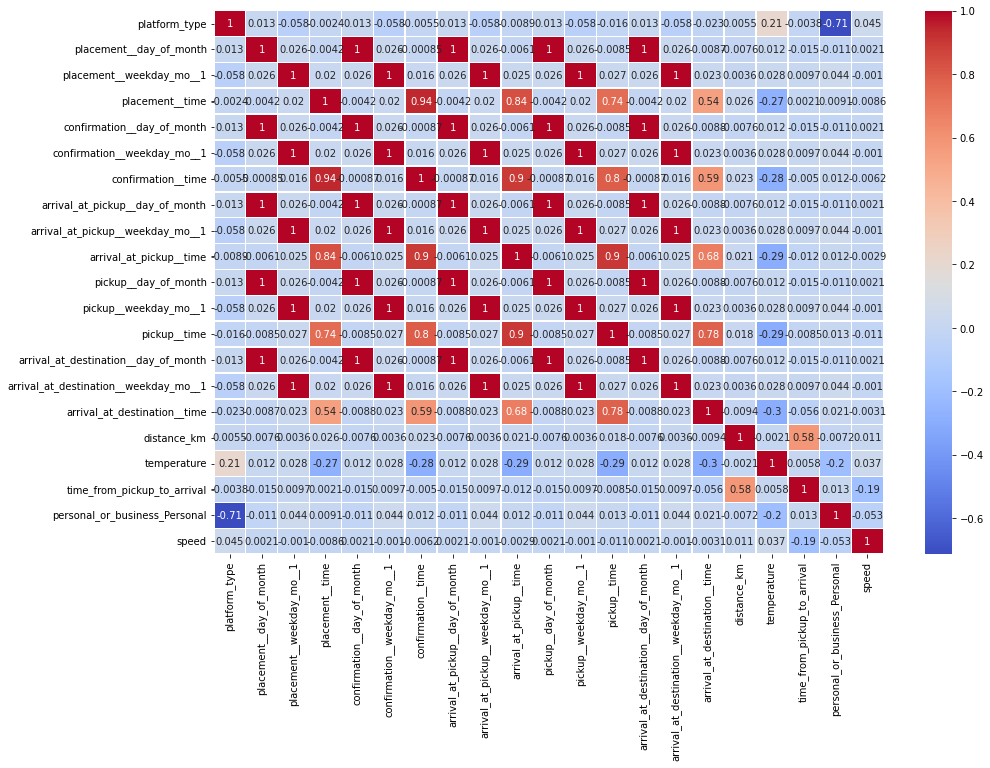

In [21]:
#filter methods
train_corr = train.corr()
plt.figure(figsize=(15,10))

# We then plot our heatmap visualistion
# 
import seaborn as sns
sns.heatmap(train_corr, annot=True, linewidth=0.5, cmap='coolwarm');


In [22]:
#there is poor correlation between target and features variable with only distance correlating with delivery time
# We then check for modeling with only normalisation
# We select our features variable(X) and target variables(y)
X = train[['distance_km', 'speed']]
y = train['time_from_pickup_to_arrival']

# Splitting our dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42) 

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

#create a model object for random forest
forest_model = RandomForestRegressor(random_state=42)

#train the model using the train dataset
forest_model.fit(X_train, y_train)

#get a prediction for the target test using the trained model
y_prediction = forest_model.predict(X_test)

#use RMSE error to evaluate our model
print(f'RMSE forest {np.sqrt(mean_squared_error(y_test, y_prediction))}')

RMSE forest 60.43068020965751


### Wrapper Method:Step Forward Feature Selection

In [23]:

# importing six and sys
import six
import sys
sys.modules['sklearn.externals.six'] = six

# installing mlrose
!pip install mlrose
import mlrose

# importing joblib
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6441927daffd8e0a675bbc8f6267972c9516c4719aecbb5323b358cf557ea10d
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [27]:
# We select our features variable(X) and target variables(y)
X = train.drop(columns=['time_from_pickup_to_arrival'])
y = train['time_from_pickup_to_arrival']


# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

#create a model object for random forest
forest_model = RandomForestRegressor(random_state=42)


from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(forest_model,
           k_features=4,
           forward=True,
           verbose=2,
           scoring='r2',
           cv=4)
 
# Perform step forward feature selection
feature_selector = feature_selector.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   26.4s finished

[2022-11-18 18:28:07] Features: 1/4 -- score: 0.34369780628105573[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   46.8s finished

[2022-11-18 18:28:54] Features: 2/4 -- score: 0.9979649758080766[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.5min finished

[2022-11-18 18:31:24] Features: 3/4 -- score: 0.9979533004247367[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [28]:
# Which are the selected features?
# The columns at these indexes are those which were selected
# ---
#
feat_cols = list(feature_selector.k_feature_idx_)
print(feat_cols)

[0, 16, 18, 19]


In [29]:
# We can now use those features to build our model
# ---
#
from sklearn import metrics
# Without step forward feature selection (sffs)
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# With step forward feature selection
forest_model2 = RandomForestRegressor(random_state=42)
forest_model2.fit(X_train[:, feat_cols], y_train)

# Making Predictions and determining the accuracies
y_test_pred = forest_model.predict(X_test)
print('Decision Tree RMSE Without sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

y_test_pred2 = forest_model2.predict(X_test[:, feat_cols])
print('Decision Tree RMSE with sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))

Decision Tree RMSE Without sffs: 72.80746632639435
Decision Tree RMSE with sffs: 61.234359089274655


###Wrapper Method:Step Backward Feature Selection

In [24]:
# We select our features variable(X) and target variables(y)
X = train.drop(columns=['time_from_pickup_to_arrival'])
y = train['time_from_pickup_to_arrival']


# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

#create a model object for random forest
forest_model = RandomForestRegressor(random_state=42)


from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(forest_model,
           k_features=4,
           forward=False,
           verbose=2,
           scoring='r2',
           cv=4)
 
# Perform step forward feature selection
feature_selector = feature_selector.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 10.6min finished

[2022-11-19 05:46:38] Features: 19/4 -- score: 0.9961772849688773[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  9.1min finished

[2022-11-19 05:55:41] Features: 18/4 -- score: 0.99629253037763[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  8.2min finished

[2022-11-19 06:03:50] Features: 17/4 -- score: 0.9963704683479032[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [25]:
# Which are the selected features?
# The columns at these indexes are those which were selected
# ---
#
feat_cols = list(feature_selector.k_feature_idx_)
print(feat_cols)

[5, 16, 18, 19]


In [27]:
# We can now use those features to build our model
# ---
# Without step backwards feature selection (sffs)
from sklearn import metrics
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# With step forward feature selection
forest_model2 = RandomForestRegressor(random_state=42)
forest_model2.fit(X_train[:, feat_cols], y_train)

# Making Predictions and determining the accuracies
y_test_pred = forest_model.predict(X_test)
print('Decision Tree RMSE Without sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

y_test_pred2 = forest_model2.predict(X_test[:, feat_cols])
print('Decision Tree RMSE with sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))

Decision Tree RMSE Without sffs: 72.80746632639435
Decision Tree RMSE with sffs: 64.04308420331985


###Recursive Feature Elimination

In [28]:
# First, we then perform modeling with both standardisation and normalisation.
# We will use this as our base for our solution, then perform feature engineering 
# by filter methods.
# ---

# We select our features variable(X) and target variables(y)
X = train.drop(columns=['time_from_pickup_to_arrival'])
y = train['time_from_pickup_to_arrival']


# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Fitting in our models   
#create a model object for random forest
forest_model = RandomForestRegressor(random_state=42)


# We want to select the best 2 features for our model. 
# NB: n_features_to_select will include the response variable
# ---
#  
from sklearn.feature_selection import RFE
forest_model = RFE(forest_model, n_features_to_select = 3, step=1)

forest_model.fit(X_train, y_train)

# Making Predictions  
forest_y_pred =forest_model.predict(X_test)

# Finally, evaluate our model  
print('forest  RMSE:', np.sqrt(metrics.mean_squared_error(y_test, forest_y_pred)))
 
# Displaying our best features
print('forest Selected features: %s' % list(X.columns[forest_model.support_]))

forest  RMSE: 64.89446526519933
forest Selected features: ['arrival_at_destination__day_of_month', 'distance_km', 'speed']


### 5.b) Recommendations

From the above analysis, 
* we have found using feature engineering greatly improve the prediction model. we found a few features to be correlated with the delivery time which are 'distance_km', 'speed'.
* the best model is when you only consider 'distance_km'





## 6. Challenging your Solution

> only one features was higly correlated with target. more variable needs that correlate with delivery time
>

## 7. Follow up questions

more variable for predicting the target are needed

### a). Did we have the right data?
> more variable for predicting the target are needed

### b). Do we need other data to answer our question?



> more variable for predicting the target are needed





### c). Did we have the right question?



> YES





